In [31]:
#lets load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
#loading dataset to pandas dataframe
df = pd.read_csv(r"C:\Users\User\Downloads\Web_data.csv")

In [33]:
df.head()

,Data time spent on site,Age,Area Income,Daily Internet Usage,Ad_Topic,Country,City,Male,Time_Period,Clicked
0,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,0
1,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,1
2,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,0
3,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,1
4,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,0


In [34]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data time spent on site  6657 non-null   float64
 1   Age                      6657 non-null   int64  
 2   Area Income              6657 non-null   float64
 3   Daily Internet Usage     6657 non-null   float64
 4   Ad_Topic                 6657 non-null   object 
 5   Country                  6657 non-null   object 
 6   City                     6657 non-null   object 
 7   Male                     6657 non-null   object 
 8   Time_Period              6657 non-null   object 
 9   Clicked                  6657 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 520.2+ KB


In [36]:
df.describe()

,Data time spent on site,Age,Area Income,Daily Internet Usage,Clicked
count,6657.000000,6657.000000,6657.000000,6657.000000,6657.000000
mean,66.849548,37.258825,55930.486743,184.947684,0.456362
std,15.509672,10.995458,13110.339257,43.189896,0.498129
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,55.200000,28.000000,48454.000000,145.730000,0.000000
50%,70.660000,36.000000,58183.000000,193.580000,0.000000
75%,79.570000,46.000000,65957.000000,222.260000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


# Data Visualization

Text(0.5, 0, 'Age')

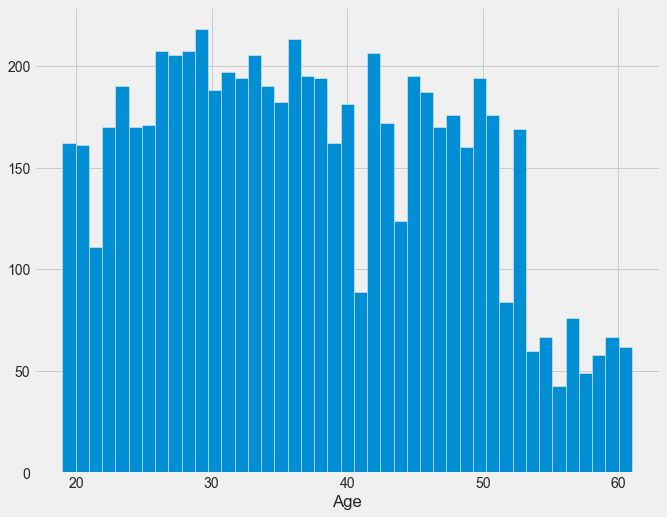

In [37]:
plt.figure(figsize=(10,8))
df.Age.hist(bins=df.Age.nunique())
plt.xlabel('Age')

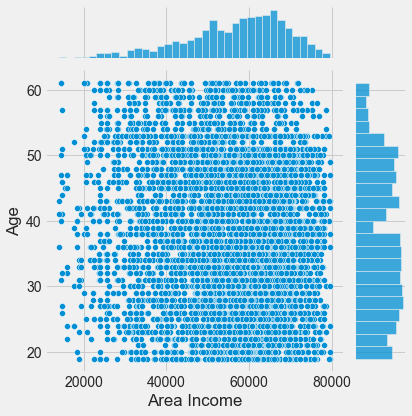

In [40]:
sns.jointplot(df['Area Income'],df.Age)

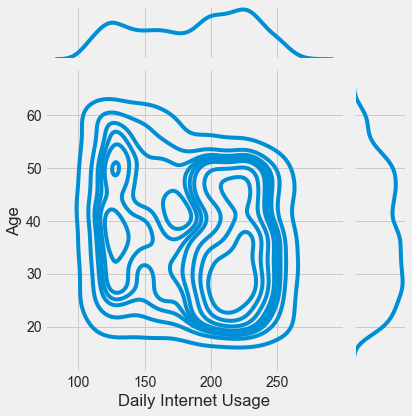

In [41]:
sns.jointplot(df['Daily Internet Usage'],df.Age,kind='kde')

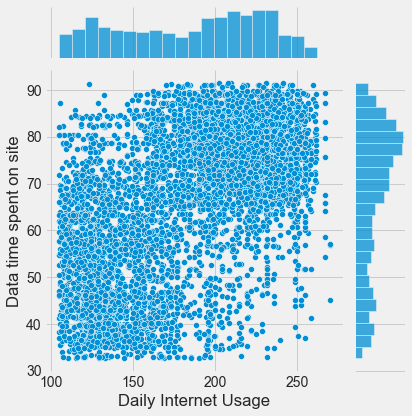

In [42]:
sns.jointplot(df['Daily Internet Usage'],df['Data time spent on site'])

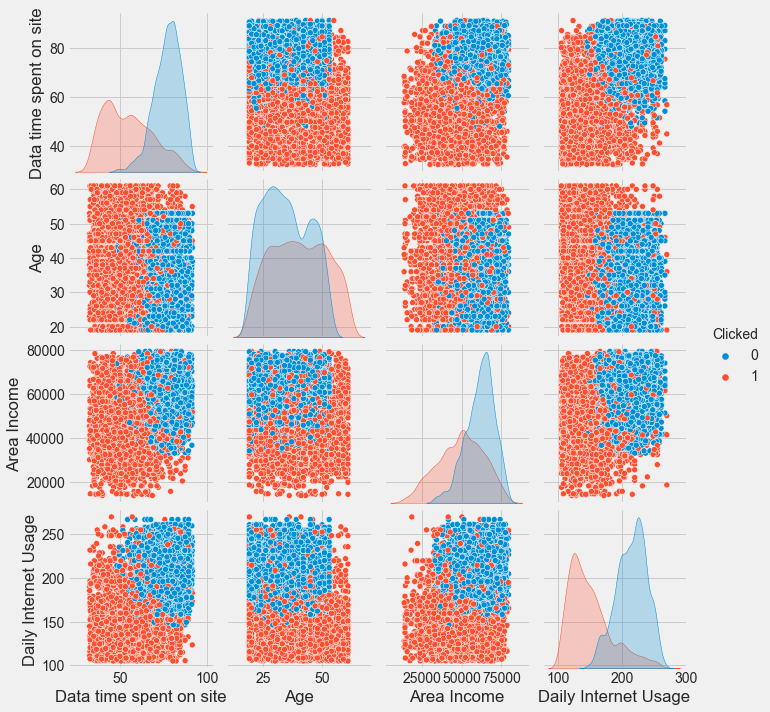

In [43]:
sns.pairplot(df,hue='Clicked')

In [44]:
df['Clicked'].value_counts()

0    3619
1    3038
Name: Clicked, dtype: int64

<AxesSubplot:>

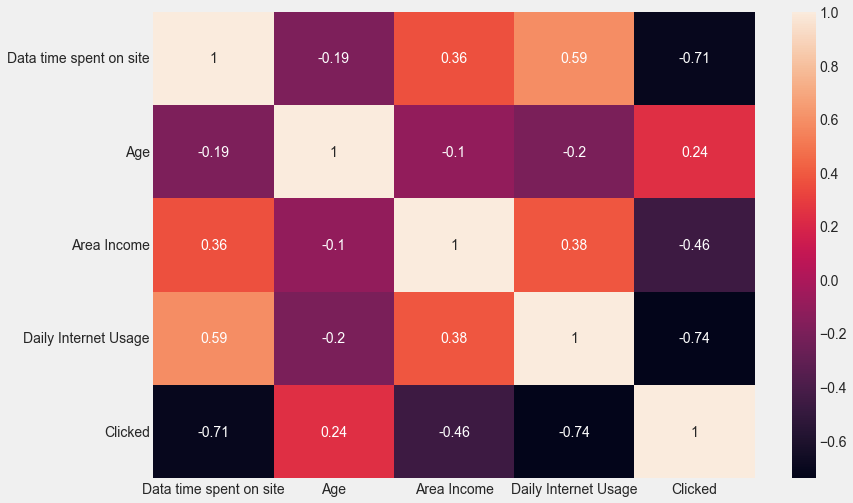

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Sigmoid Function')

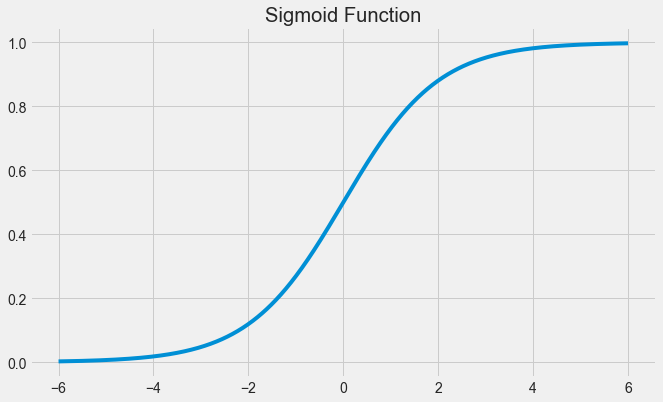

In [46]:
x = np.linspace(-6,6,num=1000)
plt.figure(figsize=(10,6))
plt.plot(x,(1/(1+np.exp(-x))))
plt.title('Sigmoid Function')

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_score(clf,X_train,Y_train,X_test,Y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report=pd.DataFrame(classification_report(Y_train,pred,output_dict=True))
        print('Train Results:\n=========================================================')
        print(f"Accuracy Score:{accuracy_score(Y_train,pred)*100:.2f}%")
        print("_____________________________________________________________________")
        print(f"Classifiction report:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix:\n{confusion_matrix(Y_train,pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report=pd.DataFrame(classification_report(Y_test,pred,output_dict=True))
        print("Train Results :\n===========================================================")
        print(f"Accuracy score :{accuracy_score(Y_test,pred)*100:.2f}%")
        print("______________________________________________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print(f"Confusion Matrix:\n{confusion_matrix(Y_test,pred)}\n")
              
              

In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X =df.drop(columns=['Clicked','Time_Period','Country','City','Ad_Topic'],axis=1)
Y = df['Clicked']

In [69]:
df['Male'].apply(pd.to_numeric)

ValueError: Unable to parse string "No" at position 0

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

num_columns =['Data time spent on site','Age','Area Income','Daily Internet Usage','Male']

ct = make_column_transformer(
    (MinMaxScaler(),num_columns),
    (StandardScaler(),num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test=ct.transform(X_test)

ValueError: could not convert string to float: 'No'

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,Y_train)

print_score(lr_clf,X_train,Y_train,X_test,Y_test,train=True)
print_score(lr_clf,X_train,Y_train,X_test,Y_test,train=False)